In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn import metrics 

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings('ignore')

In [25]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combine = [df_train,df_test]

Preprocessing

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
print('Survival rate = '+str(df_train.Survived.value_counts()[1]/(df_train.Survived.value_counts()[1]+df_train.Survived.value_counts()[0])))

Survival rate = 0.3838383838383838


In [29]:
print('TRAIN');print('~'*5); df_train.info(); print();
print('TEST');print('~'*4);  df_test.info()

TRAIN
~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

TEST
~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null  

In [30]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


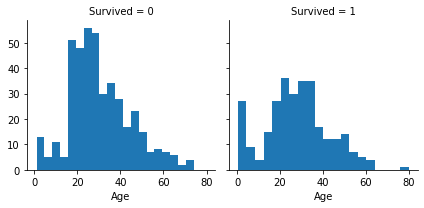

In [35]:
grid = sns.FacetGrid(df_train, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

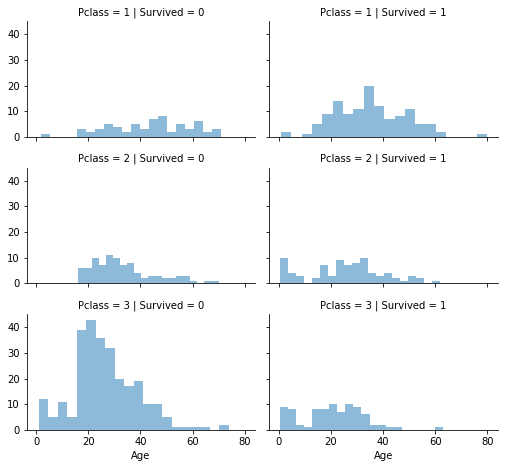

In [36]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

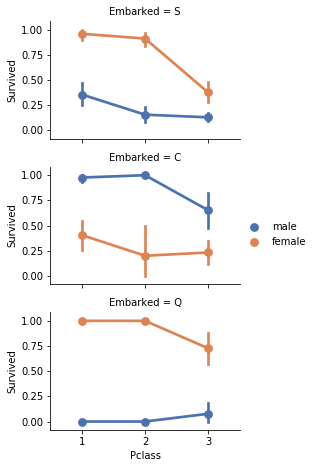

In [37]:
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

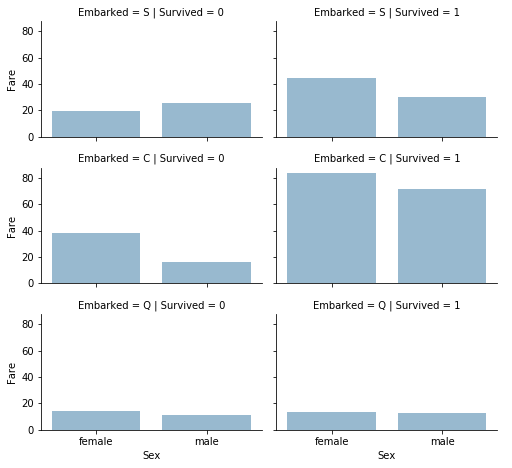

In [38]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [39]:
for x in combine:
    df = x
    df['Title'] = df["Name"].str.split(" ")
    df['Title'] = df['Title'].apply(lambda col: col[1])
    df.loc[df.Title == 'Mlle.', 'Title'] = 'Miss.'
    df.loc[df.Title == 'Ms.', 'Title'] = 'Miss.'
    df.loc[df.Title == 'Mme.', 'Title'] = 'Mrs.'
    df.loc[~df.Title.isin(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Rare']), 'Title'] = 'Rare'
    df['Age'].fillna(random.uniform(df['Age'].dropna().mean(),df['Age'].dropna().std()), inplace=True)
    df['Embarked'].fillna(df['Embarked'].dropna().mode(), inplace=True)
    df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
df_train = combine[0]
df_test = combine[1]
df_train = df_train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
df_test = df_test.drop(['Name','Cabin','Ticket'],axis=1)
combine = [df_train,df_test]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [40]:
df_train['AgeInterval'] = pd.cut(df_train['Age'], 5)
df_train[['AgeInterval', 'Survived']].groupby(['AgeInterval'], as_index=False).mean().sort_values(by='AgeInterval', ascending=True)

,AgeInterval,Survived
0,"(0.34, 16.336]",0.386282
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [41]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df_train = combine[0]
df_test = combine[1]
df_train = df_train.drop(['AgeInterval'],axis = 1)
combine = [df_train,df_test]

In [42]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,S,Mr.
1,1,1,female,2.0,1,0,71.2833,C,Mrs.
2,1,3,female,1.0,0,0,7.9250,S,Miss.
3,1,1,female,2.0,1,0,53.1000,S,Mrs.
4,0,3,male,2.0,0,0,8.0500,S,Mr.


In [43]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [44]:
df_train = df_train.drop(['SibSp','Parch'],axis = 1)
df_test = df_test.drop(['SibSp','Parch'],axis = 1)
combine = [df_train,df_test]

In [45]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,male,2.0,7.8292,Q,Mr.,1
1,893,3,female,2.0,7.0000,S,Mrs.,2
2,894,2,male,3.0,9.6875,Q,Mr.,1
3,895,3,male,1.0,8.6625,S,Mr.,1
4,896,3,female,1.0,12.2875,S,Mrs.,3
...,...,...,...,...,...,...,...,...
413,1305,3,male,1.0,8.0500,S,Mr.,1
414,1306,1,female,2.0,108.9000,C,Rare,1
415,1307,3,male,2.0,7.2500,S,Mr.,1
416,1308,3,male,1.0,8.0500,S,Mr.,1


In [46]:
df_train['FareInterval'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareInterval', 'Survived']].groupby(['FareInterval'], as_index=False).mean().sort_values(by='FareInterval', ascending=True)

,FareInterval,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
df_train = df_train.drop(['FareInterval'], axis=1)
combine = [df_train, df_test]

In [48]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,1.0,0,S,Mr.,2
1,1,1,female,2.0,3,C,Mrs.,2
2,1,3,female,1.0,1,S,Miss.,1
3,1,1,female,2.0,3,S,Mrs.,2
4,0,3,male,2.0,1,S,Mr.,1


In [49]:

df_train = pd.concat([df_train, pd.get_dummies(df_train['Title'],drop_first = True)], axis=1); 
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'],drop_first = True)], axis=1); 
df_test = pd.concat([df_test, pd.get_dummies(df_test['Title'],drop_first = True)], axis=1); 
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'],drop_first = True)], axis=1); 
df_train = df_train.drop(['Title','Embarked'],axis=1)
df_test = df_test.drop(['Title','Embarked'],axis=1)
df_train['Sex']  = LabelEncoder().fit_transform(df_train['Sex'])
df_test['Sex']  = LabelEncoder().fit_transform(df_test['Sex'])
combine = [df_train,df_test]
df_train

,Survived,Pclass,Sex,Age,Fare,FamilySize,Miss.,Mr.,Mrs.,Rare,Q,S
0,0,3,1,1.0,0,2,0,1,0,0,0,1
1,1,1,0,2.0,3,2,0,0,1,0,0,0
2,1,3,0,1.0,1,1,1,0,0,0,0,1
3,1,1,0,2.0,3,2,0,0,1,0,0,1
4,0,3,1,2.0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,1,1,0,0,0,1,0,1
887,1,1,0,1.0,2,1,1,0,0,0,0,1
888,0,3,0,0.0,2,4,1,0,0,0,0,1
889,1,1,1,1.0,2,1,0,1,0,0,0,0


Predictions

In [50]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,FamilySize,Miss.,Mr.,Mrs.,Rare,Q,S
0,892,3,1,2.0,0,1,0,1,0,0,1,0
1,893,3,0,2.0,0,2,0,0,1,0,0,1
2,894,2,1,3.0,1,1,0,1,0,0,1,0
3,895,3,1,1.0,1,1,0,1,0,0,0,1
4,896,3,0,1.0,1,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1.0,1,1,0,1,0,0,0,1
414,1306,1,0,2.0,3,1,0,0,0,1,0,0
415,1307,3,1,2.0,0,1,0,1,0,0,0,1
416,1308,3,1,1.0,1,1,0,1,0,0,0,1


In [51]:
X = df_train.drop(['Survived'],axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
def find_thresh_and_auc(clf, X_valid, y_valid):
    best_auc=0
    best_thresh=0
    thresh = 0.05
    prob = clf.predict_proba(X_valid)
    while thresh < 1:
        label = (prob[:,0] < thresh).astype(np.int)
        y_pred_prob = clf.predict_proba(X_valid)
        fpr, tpr, thresh_ = metrics.roc_curve(y_valid, y_pred_prob[:, 1], pos_label=1)
        auc = metrics.auc(fpr,tpr)
        if auc > best_auc:
            best_auc = auc
            best_thresh = thresh
        thresh += 0.05
    return best_thresh, best_auc

Logistic Reggression

In [53]:
X_train = np.array(X_train)

In [73]:
Best_lr_model=None
Best_lr_score=0
Best_lr_thresh = 0
c=0.0001
skf = StratifiedKFold(n_splits=6,shuffle=True)
while c < 1000:
    lr = LogisticRegression(C=c, random_state=1)
    for train_index, test_index in skf.split(X_train, y_train):
        lr.fit(X_train[train_index], y_train.iloc[train_index])
        score = accuracy_score(lr.predict(X_train[test_index]),y_train.iloc[test_index])
        print(c,score)
        if score>Best_lr_score:
            Best_lr_model=lr
            Best_lr_score= score
    c *= 10
print(Best_lr_model)
print(Best_lr_score)

0.0001 0.6218487394957983
0.0001 0.6134453781512605
0.0001 0.6134453781512605
0.0001 0.6134453781512605
0.0001 0.6186440677966102
0.0001 0.6186440677966102
0.001 0.6218487394957983
0.001 0.6134453781512605
0.001 0.6134453781512605
0.001 0.6134453781512605
0.001 0.6186440677966102
0.001 0.6186440677966102
0.01 0.7899159663865546
0.01 0.773109243697479
0.01 0.7563025210084033
0.01 0.7983193277310925
0.01 0.7966101694915254
0.01 0.7372881355932204
0.1 0.8319327731092437
0.1 0.8151260504201681
0.1 0.8151260504201681
0.1 0.8319327731092437
0.1 0.7796610169491526
0.1 0.788135593220339
1.0 0.8571428571428571
1.0 0.8571428571428571
1.0 0.7647058823529411
1.0 0.8739495798319328
1.0 0.8135593220338984
1.0 0.7966101694915254
10.0 0.8907563025210085
10.0 0.8319327731092437
10.0 0.773109243697479
10.0 0.8487394957983193
10.0 0.8728813559322034
10.0 0.8050847457627118
100.0 0.8067226890756303
100.0 0.8487394957983193
100.0 0.8151260504201681
100.0 0.7647058823529411
100.0 0.847457627118644
100.0 0.8

In [54]:
Best_lr_model=None
Best_lr_score=0
Best_lr_thresh = 0
c=0.0001
skf = StratifiedKFold(n_splits=6,shuffle=True)
while c < 1000:
    lr = LogisticRegression(C=c, random_state=1)
    for train_index, test_index in skf.split(X_train, y_train):
        lr.fit(X_train[train_index], y_train.iloc[train_index])
        thresh,score = find_thresh_and_auc(lr,X_train[test_index],y_train.iloc[test_index])
        print(c,score)
        if score>Best_lr_score:
            Best_lr_model=lr
            Best_lr_score= score
            Best_lr_thresh = thresh
    c *= 10
print(Best_lr_model)
print(Best_lr_score)

0.0001 0.7346846846846847
0.0001 0.7864800476474092
0.0001 0.8062835020845742
0.0001 0.796605122096486
0.0001 0.7662100456621005
0.0001 0.8400304414003044
0.001 0.8088588588588589
0.001 0.8595890410958904
0.001 0.8205777248362119
0.001 0.7501488981536629
0.001 0.8255707762557077
0.001 0.8117199391171994
0.01 0.8738738738738739
0.01 0.8810303752233473
0.01 0.8299583085169744
0.01 0.8150684931506849
0.01 0.832572298325723
0.01 0.8366818873668188
0.1 0.8561561561561561
0.1 0.7843954734961286
0.1 0.8259380583680763
0.1 0.8595890410958904
0.1 0.902435312024353
0.1 0.8828006088280062
1.0 0.8953453453453454
1.0 0.8945801072066706
1.0 0.8910065515187613
1.0 0.8165574746873139
1.0 0.8357686453576865
1.0 0.8444444444444444
10.0 0.8917417417417417
10.0 0.8793924955330554
10.0 0.7846932698034546
10.0 0.9057474687313877
10.0 0.8735159817351598
10.0 0.8100456621004566
100.0 0.8773273273273273
100.0 0.8268314472900535
100.0 0.8807325789160214
100.0 0.8366587254318046
100.0 0.9203957382039574
100.0 0.

In [74]:
y_pred = Best_lr_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8100558659217877

AdaBoost

In [64]:
Best_adab_model=None
Best_adab_score=0
Best_adab_thresh = 0
for n in range(1,20):
    for c in ["gini","entropy"]:
        for lr in [0.001,0.01, 0.1, 0.2, 0.5,1,10]:
            tree = DecisionTreeClassifier(criterion=c, 
                              max_depth=n,
                              random_state=0)
            clf = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100, 
                         learning_rate=lr,
                         random_state=0)
            
            for train_index, test_index in skf.split(X_train, y_train):
                clf.fit(X_train[train_index], y_train.iloc[train_index])
                thresh,score = find_thresh_and_auc(clf,X_train[test_index],y_train.iloc[test_index])
                if score>Best_adab_score:
                    Best_adab_model=clf
                    Best_adab_score= score
                    Best_thresh_score = thresh
            print(str(n)+' '+str(c)+' '+str(lr))
            print('score = '+str(score))

print(Best_adab_model)
print(Best_adab_score)
print(Best_thresh_score)

1 gini 0.001
score = 0.7846270928462709
1 gini 0.01
score = 0.874124809741248
1 gini 0.1
score = 0.9336377473363776
1 gini 0.2
score = 0.8406392694063928
1 gini 0.5
score = 0.793607305936073
1 gini 1
score = 0.8602739726027396
1 gini 10
score = 0.22663622526636223
1 entropy 0.001
score = 0.7639269406392695
1 entropy 0.01
score = 0.8162861491628616
1 entropy 0.1
score = 0.8616438356164384
1 entropy 0.2
score = 0.8389649923896498
1 entropy 0.5
score = 0.9290715372907155
1 entropy 1
score = 0.7975646879756467
1 entropy 10
score = 0.2573820395738204
2 gini 0.001
score = 0.7802130898021309
2 gini 0.01
score = 0.8182648401826484
2 gini 0.1
score = 0.8465753424657535
2 gini 0.2
score = 0.9184170471841705
2 gini 0.5
score = 0.8045662100456621
2 gini 1
score = 0.8097412480974123
2 gini 10
score = 0.7447488584474885
2 entropy 0.001
score = 0.8712328767123287
2 entropy 0.01
score = 0.8114155251141553
2 entropy 0.1
score = 0.9191780821917809
2 entropy 0.2
score = 0.8330289193302891
2 entropy 0.5
s

15 entropy 0.5
score = 0.7929984779299847
15 entropy 1
score = 0.7669710806697109
15 entropy 10
score = 0.7582952815829528
16 gini 0.001
score = 0.7929984779299848
16 gini 0.01
score = 0.7722983257229832
16 gini 0.1
score = 0.8016742770167428
16 gini 0.2
score = 0.7843226788432267
16 gini 0.5
score = 0.828006088280061
16 gini 1
score = 0.8418569254185693
16 gini 10
score = 0.6525114155251142
16 entropy 0.001
score = 0.7628614916286149
16 entropy 0.01
score = 0.8156773211567732
16 entropy 0.1
score = 0.8353120243531202
16 entropy 0.2
score = 0.8027397260273973
16 entropy 0.5
score = 0.795738203957382
16 entropy 1
score = 0.8614916286149162
16 entropy 10
score = 0.7231354642313547
17 gini 0.001
score = 0.8471841704718417
17 gini 0.01
score = 0.8687975646879756
17 gini 0.1
score = 0.75220700152207
17 gini 0.2
score = 0.8427701674277017
17 gini 0.5
score = 0.7636225266362252
17 gini 1
score = 0.7818873668188735
17 gini 10
score = 0.771689497716895
17 entropy 0.001
score = 0.829984779299847

In [66]:
y_pred = Best_adab_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8212290502793296

Random Forest

In [56]:
Best_rf_model=None
Best_rf_score=0
Best_rf_thresh = 0
for n in range(2,20):
    for c in ["gini","entropy"]:
        for mf in ["auto",None]:
            clf = RandomForestClassifier(max_depth=n, criterion=c, max_features=mf,n_jobs=10)
            for train_index, test_index in skf.split(X_train, y_train):
                clf.fit(X_train[train_index], y_train.iloc[train_index])
                thresh,score = find_thresh_and_auc(clf,X_train[test_index],y_train.iloc[test_index])
                if score>Best_rf_score:
                    Best_rf_model=clf
                    Best_rf_score= score
                    Best_rf_thresh = thresh
            print(n, c, mf, score)
print(Best_rf_model)
print(Best_rf_score)
print(Best_rf_thresh)

2 gini auto 0.8389649923896499
2 gini None 0.8797564687975646
2 entropy auto 0.8878234398782344
2 entropy None 0.8660578386605784
3 gini auto 0.8493150684931506
3 gini None 0.8517503805175037
3 entropy auto 0.8307458143074581
3 entropy None 0.9025875190258752
4 gini auto 0.8939117199391171
4 gini None 0.8511415525114155
4 entropy auto 0.8515981735159818
4 entropy None 0.8333333333333334
5 gini auto 0.8611872146118721
5 gini None 0.8511415525114157
5 entropy auto 0.8757990867579909
5 entropy None 0.8388127853881279
6 gini auto 0.8497716894977169
6 gini None 0.8748858447488584
6 entropy auto 0.9117199391171993
6 entropy None 0.8569254185692541
7 gini auto 0.8471841704718417
7 gini None 0.8094368340943683
7 entropy auto 0.8660578386605783
7 entropy None 0.8993911719939118
8 gini auto 0.7800608828006088
8 gini None 0.7980213089802132
8 entropy auto 0.8765601217656013
8 entropy None 0.8083713850837139
9 gini auto 0.8248097412480975
9 gini None 0.8146118721461186
9 entropy auto 0.78112633181

In [77]:
y_pred = Best_rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8044692737430168

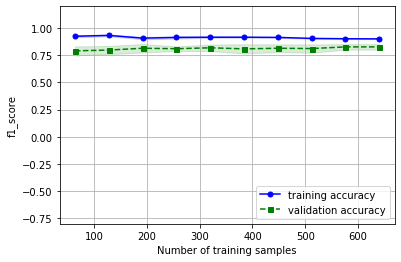

In [72]:
train_sizes, train_scores, test_scores = learning_curve(estimator=Best_rf_model, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=10, n_jobs=1,scoring="accuracy")

train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1) 

plt.plot(train_sizes, train_mean,color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('f1_score')
plt.legend(loc='lower right') 
plt.ylim([-0.8, 1.2])
plt.show()

----------------------------------------------------------------------------------

TEST 

In [68]:
passengers = df_test['PassengerId']
df1= df_test.drop(['PassengerId'],axis=1)

In [ ]:
df1

In [69]:
y_pred = Best_adab_model.predict(df1)
y_pred = pd.DataFrame(y_pred)
result = pd.concat([passengers,y_pred],axis=1)
result.columns = ['PassengerId','Survived']
result.to_csv('titanic_adab_test.csv',index=False)


----------------------------------------------------------------------------------